In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [107]:
heart_df = pd.read_csv(r'raw_merged_heart_dataset.csv')

In [108]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


In [110]:
##Creating a new column to simulate countries over the world with high rate of heart disease
high_heart_disease_countries = ["United States", "Russia", "India", "China", "Brazil", "Ukraine", "Germany", "United Kingdom", "Mexico", "South Africa"]

# As 2nd column
heart_df.insert(1, 'Country', np.random.choice(high_heart_disease_countries, size=len(heart_df)))


In [111]:
# Each sublist contains 3 states/regions with high heart disease burden for the corresponding country
high_heart_disease_states = [
    ["Alabama", "Mississippi", "West Virginia"],         # United States
    ["Moscow Oblast", "Saint Petersburg", "Krasnodar"],  # Russia
    ["Kerala", "Tamil Nadu", "Goa"],                     # India
    ["Beijing", "Shanghai", "Guangdong"],               # China
    ["São Paulo", "Rio de Janeiro", "Bahia"],           # Brazil
    ["Kyiv", "Kharkiv", "Dnipro"],                      # Ukraine
    ["Bavaria", "North Rhine-Westphalia", "Saxony"],    # Germany
    ["England", "Scotland", "Wales"],                   # United Kingdom
    ["Mexico City", "Jalisco", "Nuevo León"],           # Mexico
    ["Gauteng", "KwaZulu-Natal", "Eastern Cape"]        # South Africa
]


In [112]:
#Function to assign Random states based on the countries defined earlier
def pick_state(Country):
    if Country in high_heart_disease_countries:
        country_index = high_heart_disease_countries.index(Country)
        return np.random.choice(high_heart_disease_states[country_index])
    else:
        np.nan

In [113]:
heart_df.insert(2,'State', heart_df['Country'].apply(pick_state))

In [114]:
heart_df.head()

,age,Country,State,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,South Africa,KwaZulu-Natal,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Russia,Krasnodar,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,United Kingdom,Wales,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Germany,North Rhine-Westphalia,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Mexico,Mexico City,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
heart_df.groupby(['Country','State'])[['State']].count()

State
Country        State                        
Brazil         Bahia                      66
               Rio de Janeiro             69
               São Paulo                  62
China          Beijing                    63
               Guangdong                  63
               Shanghai                   80
Germany        Bavaria                    80
               North Rhine-Westphalia     76
               Saxony                     87
India          Goa                        58
               Kerala                     93
               Tamil Nadu                 60
Mexico         Jalisco                    65
               Mexico City                73
               Nuevo León                 70
Russia         Krasnodar                  72
               Moscow Oblast              84
               Saint Petersburg           70
South Africa   Eastern Cape               70
               Gauteng                    82
               KwaZulu-Natal              82
Ukraine        Dnipro                     70
               Kharkiv                    79
               Kyiv                       74
United Kingdom England                    75
               Scotland                   61
               Wales                      70
United States  Alabama                    69
               Mississippi                68
               West Virginia              90

In [116]:
#No nullvalues here 
heart_df.isnull().sum().sum()

np.int64(0)

In [117]:
heart_df.corr(numeric_only=True)

,age,sex,cp,oldpeak,target
age,1.000000,-0.094249,-0.083587,0.228801,-0.094863
sex,-0.094249,1.000000,0.004036,0.090276,-0.139418
cp,-0.083587,0.004036,1.000000,-0.098740,0.343394
oldpeak,0.228801,0.090276,-0.098740,1.000000,-0.206794
target,-0.094863,-0.139418,0.343394,-0.206794,1.000000


In [118]:
heart_df.shape

(2181, 16)

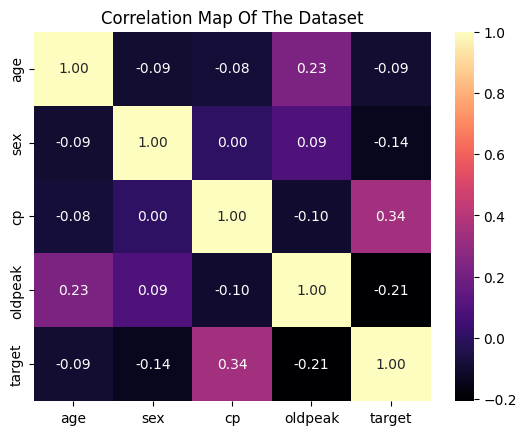

In [119]:
sns.heatmap(data=heart_df.corr(numeric_only=True),cmap='magma', annot=True , fmt='.2f')
plt.title('Correlation Map Of The Dataset')
plt.show()

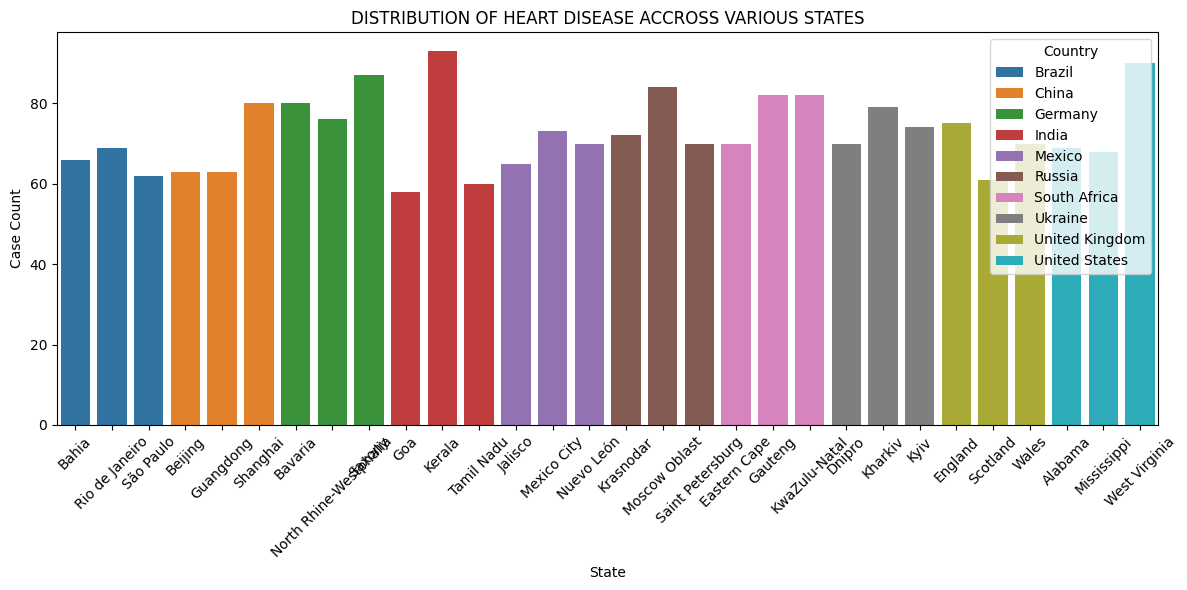

In [120]:
#Checking distribution among states 
state_count = heart_df.groupby(['Country','State'])['State'].count().reset_index(name='Case Count')




plt.figure(figsize=(12,6))
sns.barplot(data=state_count, x ='State' , y='Case Count', hue='Country')
plt.title("DISTRIBUTION OF HEART DISEASE ACCROSS VARIOUS STATES")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [121]:
state_count.head()

,Country,State,Case Count
0,Brazil,Bahia,66
1,Brazil,Rio de Janeiro,69
2,Brazil,São Paulo,62
3,China,Beijing,63
4,China,Guangdong,63


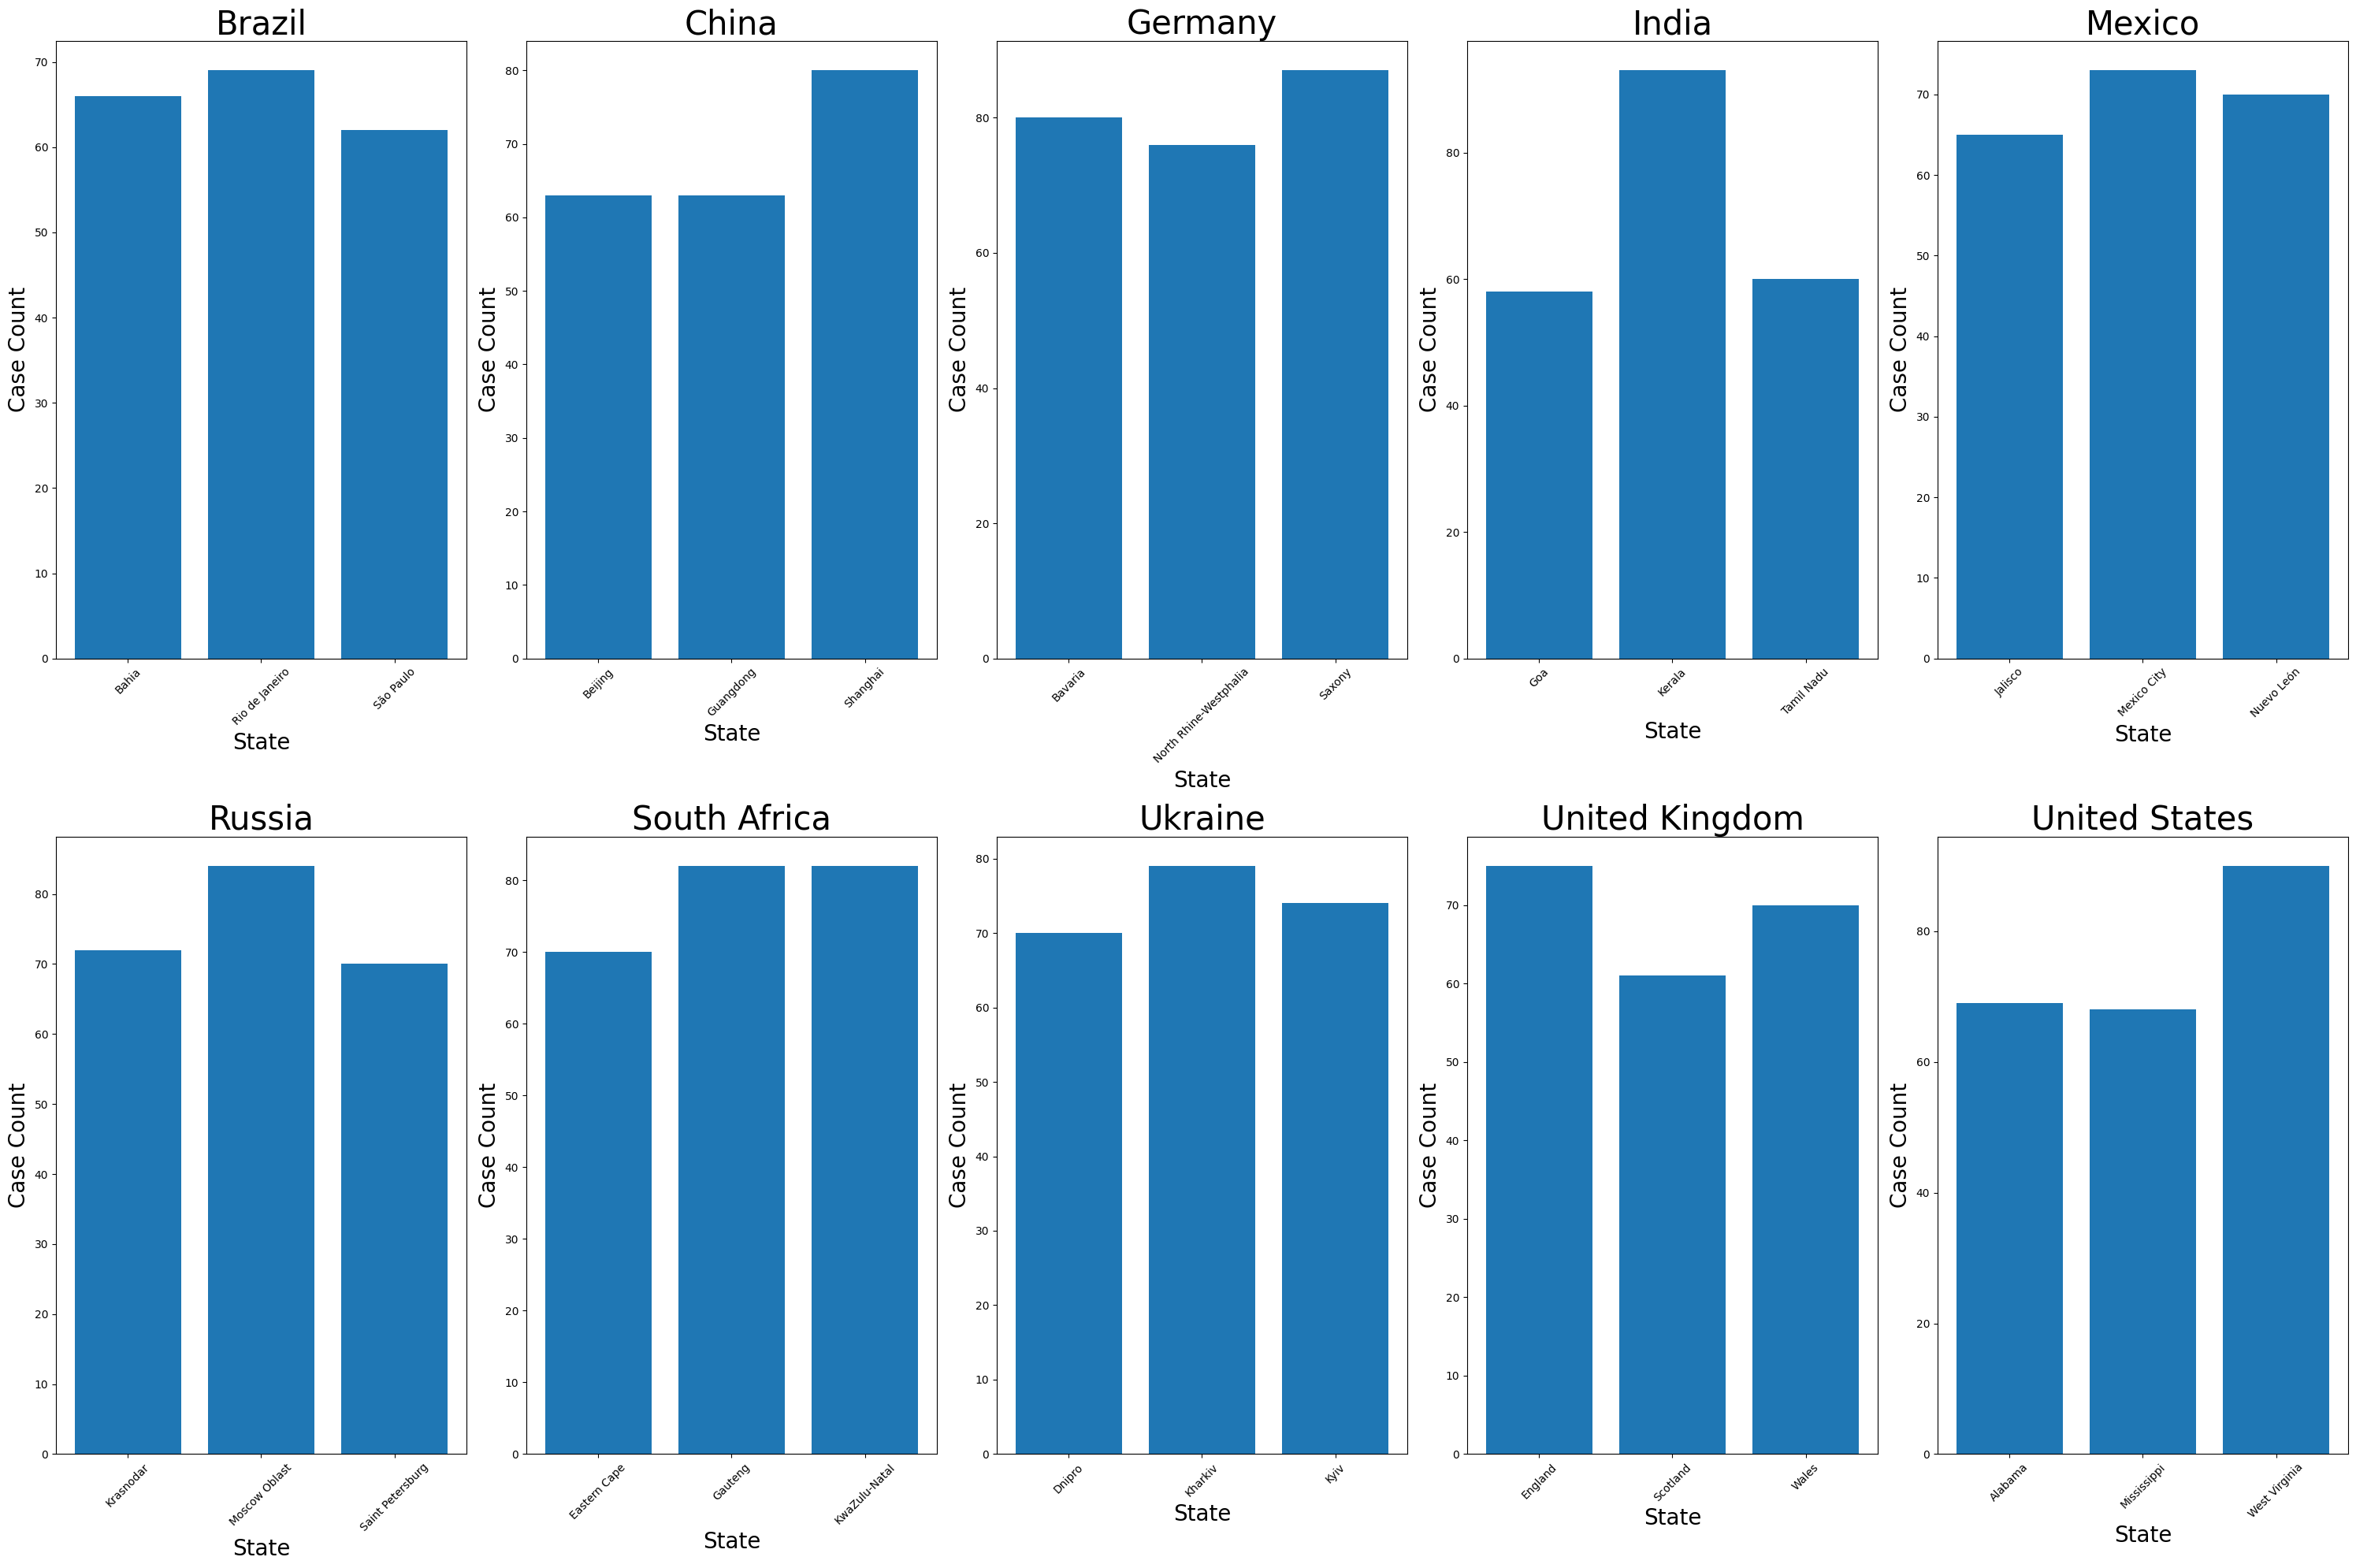

In [122]:
fig, axes = plt.subplots(2, 5, figsize=(30, 20))

countries = state_count['Country'].unique()

for ax, country in zip(axes.flat, countries):
    data = state_count.loc[state_count['Country'] == country][['State', 'Case Count']]
    ax.bar(data['State'], data['Case Count'])
    ax.set_title(country, fontsize=30)
    ax.set_xlabel('State', fontsize=20)
    ax.set_ylabel('Case Count', fontsize=20)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [123]:
def classify_gender(sex):
    if sex == 0:
        return "Male"
    else:
        return "Female"
    


heart_df.insert(4,'Gender', heart_df['sex'].apply(classify_gender))

In [124]:
heart_df.head()

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,South Africa,KwaZulu-Natal,1,Female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Russia,Krasnodar,1,Female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,United Kingdom,Wales,0,Male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Germany,North Rhine-Westphalia,1,Female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Mexico,Mexico City,0,Male,0,120,354,0,1,163,1,0.6,2,0,2,1


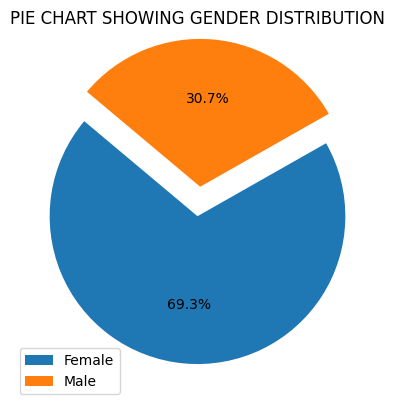

In [125]:
plt.pie(heart_df['sex'].value_counts(), autopct='%1.1f%%', startangle=140, explode=[0,0.2])
plt.legend(labels= heart_df['Gender'].unique())
plt.title("PIE CHART SHOWING GENDER DISTRIBUTION")
plt.show()

In [126]:
def Diagnosis_Target(target):
    if target == 0:
        return "Negative"
    else:
        return "Positive"
    


heart_df.insert(16,'Diagnosis', heart_df['target'].apply(Diagnosis_Target))

In [127]:
heart_df.to_csv('heart_disease_dataset_with_countries_states.csv', index=False)

In [128]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2181 non-null   int64  
 1   Country    2181 non-null   object 
 2   State      2181 non-null   object 
 3   sex        2181 non-null   int64  
 4   Gender     2181 non-null   object 
 5   cp         2181 non-null   int64  
 6   trestbps   2181 non-null   object 
 7   chol       2181 non-null   object 
 8   fbs        2181 non-null   object 
 9   restecg    2181 non-null   object 
 10  thalachh   2181 non-null   object 
 11  exang      2181 non-null   object 
 12  oldpeak    2181 non-null   float64
 13  slope      2181 non-null   object 
 14  ca         2181 non-null   object 
 15  thal       2181 non-null   object 
 16  Diagnosis  2181 non-null   object 
 17  target     2181 non-null   int64  
dtypes: float64(1), int64(4), object(13)
memory usage: 306.8+ KB


In [129]:
heart_df.sample()

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,Diagnosis,target
1664,44,Ukraine,Kharkiv,1,Female,2,130,233,0,0,179,1,0.4,1,0,3,Negative,0


In [130]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2181 non-null   int64  
 1   Country    2181 non-null   object 
 2   State      2181 non-null   object 
 3   sex        2181 non-null   int64  
 4   Gender     2181 non-null   object 
 5   cp         2181 non-null   int64  
 6   trestbps   2181 non-null   object 
 7   chol       2181 non-null   object 
 8   fbs        2181 non-null   object 
 9   restecg    2181 non-null   object 
 10  thalachh   2181 non-null   object 
 11  exang      2181 non-null   object 
 12  oldpeak    2181 non-null   float64
 13  slope      2181 non-null   object 
 14  ca         2181 non-null   object 
 15  thal       2181 non-null   object 
 16  Diagnosis  2181 non-null   object 
 17  target     2181 non-null   int64  
dtypes: float64(1), int64(4), object(13)
memory usage: 306.8+ KB
